In [28]:
# Standard imports
import numpy as np
import pandas as pd

#
import random

# To interact with the operating system
import os

# For statistical modeling
import scipy.stats as stats

# To acquire MYSQL Data
import acquire
from env import username, password, host
import wrangle

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import evaluate

# For running modeling
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures


# Exercises:
### 1. Select a dataset with a continuous target variable.

### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

---

In [2]:
# 1. Select a dataset with a continuous target variable.

#### I'll use the tip dataset

In [3]:
tips = pd.read_csv('tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
# 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [5]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [8]:
tips.day[tips.day == 'Thur'] = tips.day.str.replace('Thur', '1')
tips.day[tips.day == 'Fri'] = tips.day.str.replace('Fri', '2')
tips.day[tips.day == 'Sat'] = tips.day.str.replace('Sat', '3')
tips.day[tips.day == 'Sun'] = tips.day.str.replace('Sun', '4')

In [ ]:
tips.day.astype()

In [9]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3


In [10]:
t = pd.get_dummies(data = tips, columns={'sex', 'smoker', 'time'})

In [12]:
tips = t[['total_bill','tip','day','size','smoker_Yes','sex_Male','time_Dinner']]
tips.head(3)

,total_bill,tip,day,size,smoker_Yes,sex_Male,time_Dinner
0,16.99,1.01,4,2,0,0,1
1,10.34,1.66,4,3,0,1,1
2,21.01,3.50,4,3,0,1,1


In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(tips, 'tip')
print(tips.shape)
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

(244, 7)
(136, 6)
(59, 6)
(49, 6)


In [14]:
X_train.head(3)

,total_bill,day,size,smoker_Yes,sex_Male,time_Dinner
18,16.97,4,3,0,0,1
172,7.25,4,2,1,1,1
118,12.43,1,2,0,0,0


In [15]:
y_train

18     3.50
172    5.15
118    1.80
28     4.30
237    1.17
       ... 
233    1.47
6      2.00
7      3.12
115    3.50
166    2.24
Name: tip, Length: 136, dtype: float64

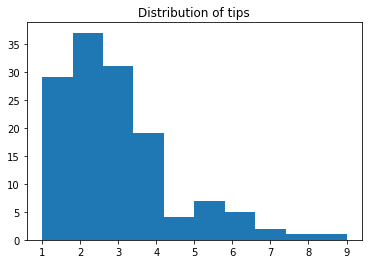

In [16]:
# Visualizing tip distribution
plt.hist(y_train)
plt.title('Distribution of tips')
plt.show()

In [17]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tip
18,3.50
172,5.15
118,1.80
28,4.30
237,1.17


In [18]:
# 1. Predict tip_pred_mean
tip_pred_mean = y_train.tip.mean()
y_train['tip_pred_mean'] = tip_pred_mean
y_validate['tip_pred_mean'] = tip_pred_mean

# 2. compute tip_pred_median
tip_pred_median = y_train.tip.median()
y_train['tip_pred_median'] = tip_pred_median
y_validate['tip_pred_median'] = tip_pred_median

# 3. RMSE of tip_pred_mean
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tip_pred_median
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.45 
Validate/Out-of-Sample:  1.52
RMSE using Median
Train/In-Sample:  1.48 
Validate/Out-of-Sample:  1.58


In [19]:
from sklearn.metrics import explained_variance_score

In [20]:
rmse_validate

1.5828749856950117

In [21]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_mean)}])

In [22]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16


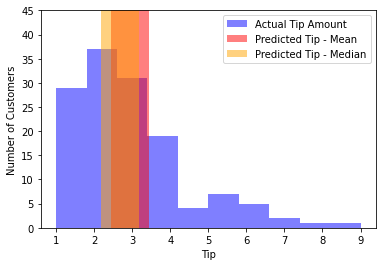

In [23]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tip, color='blue', alpha=.5, label="Actual Tip Amount")
plt.hist(y_train.tip_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tip - Mean")
plt.hist(y_train.tip_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tip - Median")
plt.xlabel("Tip")
plt.ylim(top=45)
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# OLS

In [24]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit
lm.fit(X_train, y_train.tip)

# predict train
# use
y_train['tip_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm) ** (1/2)
# predict validate
y_validate['tip_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.0245248943152774 
Validation/Out-of-Sample:  1.1510710542217357


In [25]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lm)}, ignore_index=True)

In [26]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16
1,OLS lm 1,1.151071,4.092923e-01


### LassoLars

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (lars). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [29]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tip)

# predict train
y_train['tip_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lars) ** 0.5

# predict validate
y_validate['tip_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.4512460770849047 
Validation/Out-of-Sample:  1.5173853468530591


In [30]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lars)}, ignore_index=True)

In [31]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16
1,OLS lm 1,1.151071,4.092923e-01
2,LassoLars alpha 1,1.517385,2.220446e-16


### TweedieRegressor (GLM)

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (glm). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 


In [33]:
 # create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

glm.fit(X_train, y_train.tip)

# predict train
y_train['tip_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_glm) ** 0.5


# predict validate
y_validate['tip_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  1.0434867531458745 
Validation/Out-of-Sample:  1.167092056548772


In [34]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_glm)}, ignore_index=True)

In [35]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16
1,OLS lm 1,1.151071,4.092923e-01
2,LassoLars alpha 1,1.517385,2.220446e-16
3,GLM Model power 1,1.167092,3.923545e-01


### Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

1. Create the new features, based on value indicated for degree for train, validate & test. 

2. Fit the Linear Regression model

3. Predict using the transformed (squared or cubed, e.g.) features 

4. Evaluate using RMSE

5. Repeat predictions and evaluation for validation.

6. Compare RMSE train vs. validation. Overfitting?


In [36]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

## **LinearRegression**

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit 
lm2.fit(X_train_degree2, y_train.tip)

# predict train
# 
# use the thing!
y_train['tip_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm2) ** (1/2)
# predict validate
y_validate['tip_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm2) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.6883375372554748 
Validation/Out-of-Sample:  2.61761001743763


In [37]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lm2)}, ignore_index=True)

In [39]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16
1,OLS lm 1,1.151071,4.092923e-01
2,LassoLars alpha 1,1.517385,2.220446e-16
3,GLM Model power 1,1.167092,3.923545e-01
4,Quadratic Model,2.617610,-1.989987e+00


---

## Predicted Tip vs. Actual Tip 

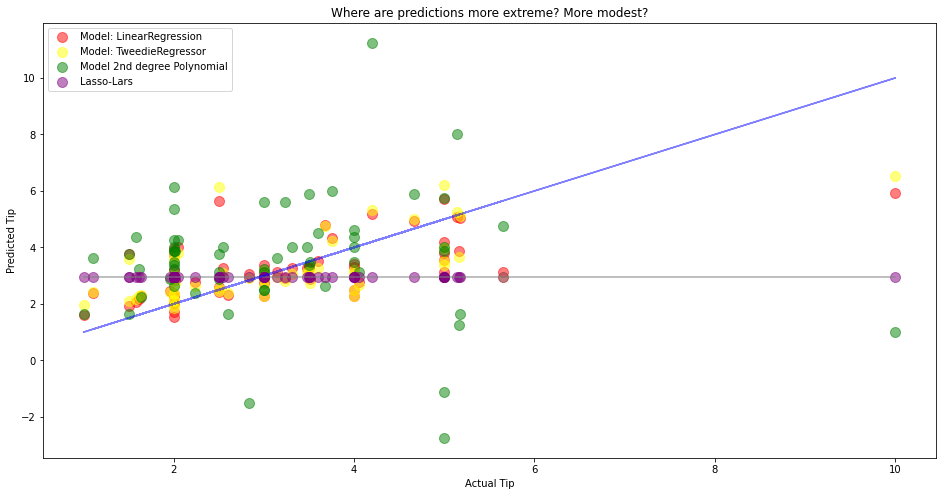

In [44]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tip, y_validate.tip_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tip, y_validate.tip, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tip, y_validate.tip_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm, 
             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.tip, y_validate.tip_pred_lars, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")

plt.legend()
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

---

## Plotting errors for the Predicted Tip Amounts

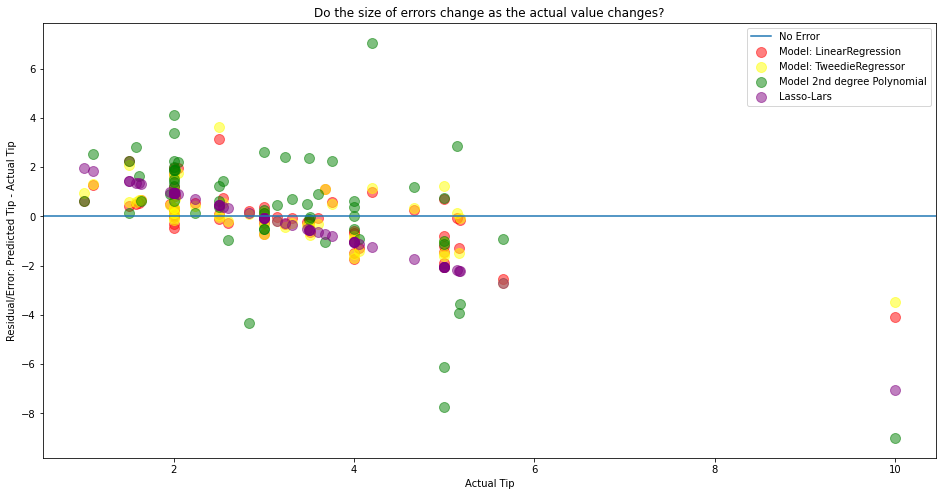

In [45]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm - y_validate.tip, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm - y_validate.tip, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2 - y_validate.tip, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.tip, y_validate.tip_pred_lars - y_validate.tip, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")

plt.legend()
plt.xlabel("Actual Tip")
plt.ylabel("Residual/Error: Predicted Tip - Actual Tip")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

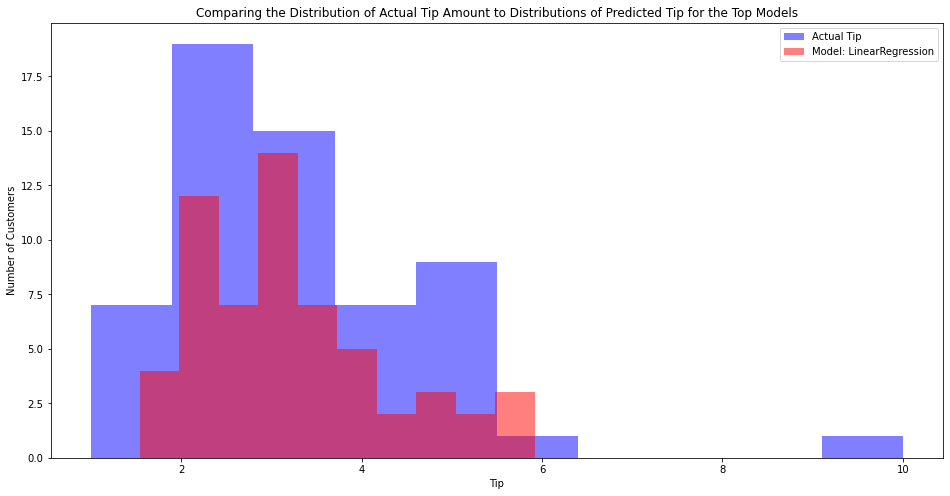

In [47]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tip, color='blue', alpha=.5, label="Actual Tip")
plt.hist(y_validate.tip_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
# plt.hist(y_validate.tip_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.tip_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tip")
plt.ylabel("Number of Customers")
plt.title("Comparing the Distribution of Actual Tip Amount to Distributions of Predicted Tip for the Top Models")
plt.legend()
plt.show()

**Model Selection & Out-of-Sample Evaluation**

Model selected: lm (using LinearRegression)

In [56]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,1.582875,2.220446e-16
1,OLS lm 1,1.151071,4.092923e-01
2,LassoLars alpha 1,1.517385,2.220446e-16
3,GLM Model power 1,1.167092,3.923545e-01
4,Quadratic Model,2.617610,-1.989987e+00


In [49]:
type(y_test)

pandas.core.series.Series

In [50]:
y_test = pd.DataFrame(y_test)

In [51]:
y_test.head()

,tip
112,4.00
19,3.35
187,2.00
169,2.00
31,2.50


In [55]:
X_test.head(3)

,total_bill,day,size,smoker_Yes,sex_Male,time_Dinner
112,38.07,4,3,0,1,1
19,20.65,3,3,0,1,1
187,30.46,4,5,1,1,1


In [48]:
lm

LinearRegression(normalize=True)

In [53]:
# predict on test
y_test['tip_pred_lm'] = lm.predict(X_test)

In [54]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.tip, y_test.tip_pred_lm) ** 0.5
print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.8458734931772423


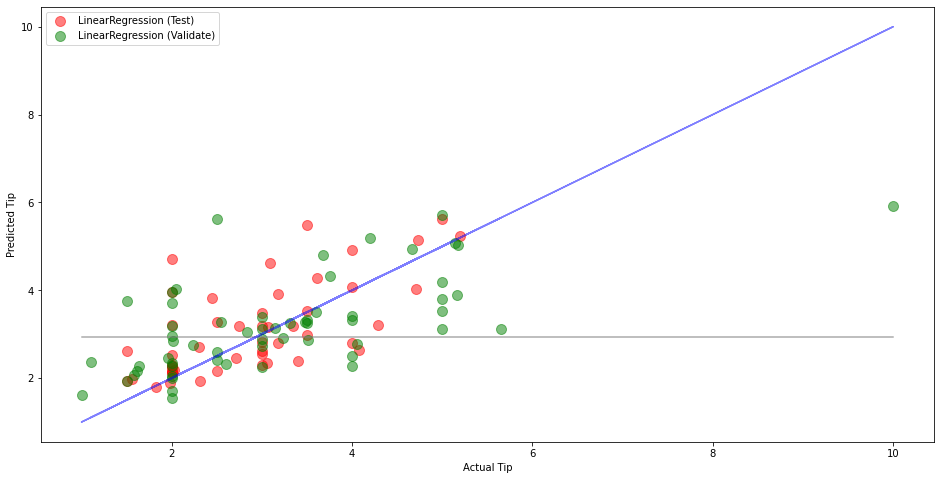

In [61]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tip, y_validate.tip_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tip, y_validate.tip, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_test.tip, y_test.tip_pred_lm, 
            alpha=.5, color="red", s=100, label="LinearRegression (Test)")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm, 
            alpha=.5, color="green", s=100, label="LinearRegression (Validate)")

plt.legend()
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.show()

In [62]:
glm

TweedieRegressor(alpha=0, power=1)